In [1]:
import pandas as pd
import numpy as np

In [2]:
#Extracted the data set
df=pd.read_csv("employees.csv")
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [3]:
df.shape

(1000, 8)

In [4]:
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [5]:
#renamed the column names to avoid further errors
columns={"First Name":"First_Name",
         "Start Date":"Start_Date",
         "Last Login Time":"Last_Login_Time",
         "Bonus %":"Bonus_perct",
         "Senior Management":"Senior_Management"}
df.rename(columns=columns,inplace=True)

In [6]:
df

,First_Name,Gender,Start_Date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [7]:
#finded that there are some null values and wrong datatypes of some columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First_Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start_Date         1000 non-null   object 
 3   Last_Login_Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus_perct        1000 non-null   float64
 6   Senior_Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [8]:
#These are the counts of the null_values that should be managed
df.isnull().sum()

First_Name            67
Gender               145
Start_Date             0
Last_Login_Time        0
Salary                 0
Bonus_perct            0
Senior_Management     67
Team                  43
dtype: int64

In [9]:
#replaced the null values in gender column with "No Gender"
df['Gender']=df['Gender'].replace(np.nan,"No Gender")

In [10]:
df['Gender'].isnull().sum()

0

In [11]:
mode=df['Senior_Management'].mode()[0]
mode

True

In [12]:
#replaced the null values in the senior_managment with the most occuring value that is = (True)
df['Senior_Management']=df['Senior_Management'].replace(np.nan,mode)

In [13]:
df['Senior_Management'].isnull().sum()

0

In [14]:
df.dropna(axis=0,how="any",inplace=True)

In [15]:
df.shape #so after managing and deleting the null values finally we get 899 rows and iniatially there were 1000 rows

(899, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First_Name         899 non-null    object 
 1   Gender             899 non-null    object 
 2   Start_Date         899 non-null    object 
 3   Last_Login_Time    899 non-null    object 
 4   Salary             899 non-null    int64  
 5   Bonus_perct        899 non-null    float64
 6   Senior_Management  899 non-null    bool   
 7   Team               899 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 57.1+ KB


In [17]:
df.isnull().sum() #so we get no null in the data set 

First_Name           0
Gender               0
Start_Date           0
Last_Login_Time      0
Salary               0
Bonus_perct          0
Senior_Management    0
Team                 0
dtype: int64

In [18]:
df 

,First_Name,Gender,Start_Date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
995,Henry,No Gender,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [19]:
#so we can see that after deleting the nulls the row index has been disturbed, so we are setting it by
df.reset_index(inplace=True)

In [20]:
df #so the index has been reset

,index,First_Name,Gender,Start_Date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
2,3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
3,4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
4,5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...,...
894,995,Henry,No Gender,11/23/2014,6:09 AM,132483,16.655,False,Distribution
895,996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
896,997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
897,998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [21]:
#And we are dropping the disturbed index
df.drop(["index"],axis=1,inplace=True)

In [22]:
df

,First_Name,Gender,Start_Date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
2,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
3,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
4,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
894,Henry,No Gender,11/23/2014,6:09 AM,132483,16.655,False,Distribution
895,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
896,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
897,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First_Name         899 non-null    object 
 1   Gender             899 non-null    object 
 2   Start_Date         899 non-null    object 
 3   Last_Login_Time    899 non-null    object 
 4   Salary             899 non-null    int64  
 5   Bonus_perct        899 non-null    float64
 6   Senior_Management  899 non-null    bool   
 7   Team               899 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 50.2+ KB


In [24]:
#Changing the data types of columns where it is wrong
df['First_Name']=df['First_Name'].astype("string")
df['Gender']=df['Gender'].astype("string")
df['Team']=df['Team'].astype("string")

In [25]:
df['Start_Date']=pd.to_datetime(df['Start_Date'],format="mixed")

In [26]:
#changed the datatypes of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First_Name         899 non-null    string        
 1   Gender             899 non-null    string        
 2   Start_Date         899 non-null    datetime64[ns]
 3   Last_Login_Time    899 non-null    object        
 4   Salary             899 non-null    int64         
 5   Bonus_perct        899 non-null    float64       
 6   Senior_Management  899 non-null    bool          
 7   Team               899 non-null    string        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1), string(3)
memory usage: 50.2+ KB


In [27]:
#creating a new column by combining the salary and bonus percentage
df["Final_Salary"]=round(df['Salary']+df['Salary']*df['Bonus_perct']/100,2)

In [28]:
df

,First_Name,Gender,Start_Date,Last_Login_Time,Salary,Bonus_perct,Senior_Management,Team,Final_Salary
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing,104066.04
1,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance,146075.36
2,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance,151660.05
3,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services,102406.95
4,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal,126823.25
...,...,...,...,...,...,...,...,...,...
894,Henry,No Gender,2014-11-23,6:09 AM,132483,16.655,False,Distribution,154548.04
895,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance,50732.63
896,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product,98291.15
897,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development,67750.92


In [29]:
df.describe()

,Start_Date,Salary,Bonus_perct,Final_Salary
count,899,899.000000,899.000000,899.000000
mean,1998-11-19 19:53:19.555061120,90479.672970,10.200201,99677.876407
min,1980-01-19 00:00:00,35013.000000,1.015000,36858.930000
25%,1990-03-21 12:00:00,62412.500000,5.267000,68798.985000
50%,1999-08-06 00:00:00,90730.000000,9.770000,99308.000000
75%,2007-09-22 00:00:00,118107.500000,14.868500,129095.255000
max,2016-07-15 00:00:00,149908.000000,19.944000,178258.600000
std,NaN,32743.875488,5.551621,36400.444846


<Axes: >

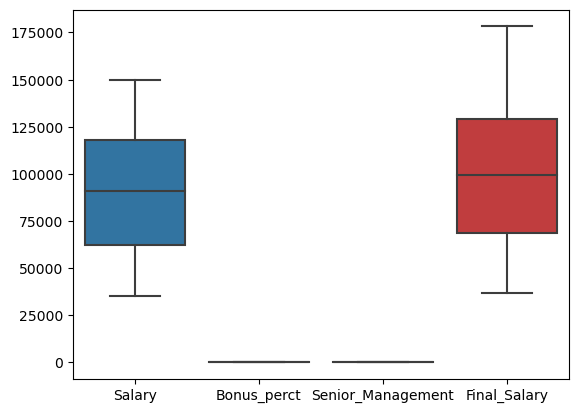

In [30]:
import seaborn as sns
sns.boxplot(df)

<Axes: xlabel='Bonus_perct'>

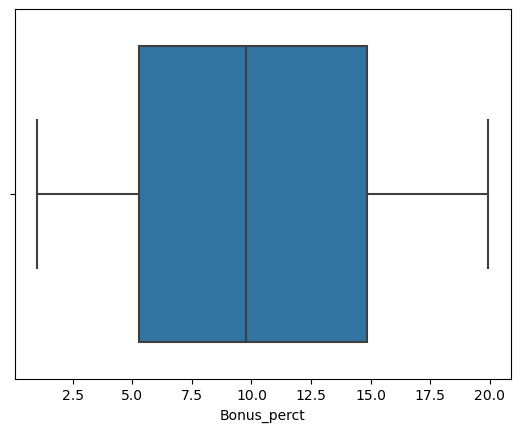

In [31]:
sns.boxplot(df,x="Bonus_perct")

In [32]:
r=df.drop(["First_Name","Gender","Start_Date","Last_Login_Time","Bonus_perct","Senior_Management","Team"],axis=1)

<Axes: >

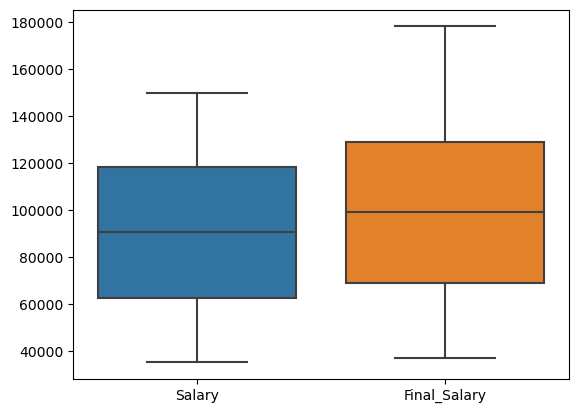

In [33]:
sns.boxplot(r)

## so the data is free from the outliers, their are no outliers present in the data so we can use this data for fiting the model 